In [46]:
import math
import numpy as np
import matplotlib.pyplot as plt

def read_text(file):
    f = open(file, 'r')  # open the file and save it in the variable f
    text = f.read().splitlines() # read the file
    f.close()          
    return text
    
file = open (r'nyc_data.txt', 'r')
f = file.readlines()
temps= []
for line in f:
        temps.append(line[:-1])
temps_float = []
for i in range(1,366):
    temp = float(temps[i-1])
    temps_float.append(temp)


   
    
def lsq_fit():
    period=365
    y_offset=55
    amplitude=25
    time_offset=200
    yt=[]
    list_2=[]
    list_3=[]
    x1=np.ones(365)
    for t in range(1,366):
        y_time=y_offset+amplitude*math.cos(2*math.pi*(t-time_offset)/period)
        yt.append(y_time)
        t_2 = math.cos((math.pi*2)*t/365)
        t_3 = math.sin((math.pi*2)*t/365)
        list_2.append(t_2)
        list_3.append(t_3)
    A = np.array([x1,list_2,list_3])
    A_t = A.transpose()
    BigX = ((np.linalg.inv(A@A_t))@(A@temps_float))
    
    
    
    
        
    residuals=[]
    for i in range(1,366):
        res=yt[i-1]-temps_float[i-1]
        residuals.append(res)
    return (yt ,residuals,BigX)
(yt,residuals,BigX)=lsq_fit()

def print_data():
    header = print(f"{'Days':^10}{'Temp(°F)':^10}{'Pre-fit Model Values (°F)':^28}{'Residual Times':^20}{'BigX':^25}")
    for x in range(365):
        func = print(f"{x+1:^10}{temps[x]:^10}{yt[x]:^20}{residuals[x]:^30}{BigX[x]:^22}")
    return(header, func)

print_data()


def plt_ts():
    days=[]
    for x in range(365):
        days.append(x+1)
    fig,axs=plt.subplots(2)
    axs[0].set_ylim([-10, 100])
    axs[0].set_xlim([1,365])
    axs[0].plot(days,temps_float,label='observations')
    axs[0].plot(days,yt,label='pre-fit model values')
    axs[0].legend(loc='upper right')
    axs[0].set_title('Observations vs. Pre-Fit Model Values')
    axs[0].set(ylabel='Temperature(°F)',yticks=(np.arange(0, 100, 10)),xlabel='Days of Year')
    axs[1].plot(residuals)
    axs[1].set_title('Residual Times')
    axs[1].set(xlabel='Days of Year',ylabel='Temperature(°F)')
    fig.tight_layout(pad=2.0)
    return(plt.show())

plt_ts()

   Days    Temp(°F)  Pre-fit Model Values (°F)     Residual Times             BigX           
    1         37     31.001682758506387       -5.998317241493613        57.060273972602744  
    2         26     30.884645607718912       4.884645607718912        -22.795747160055978  
    3         20     30.774754356889844       10.774754356889844       -6.8950233541244685  


IndexError: index 3 is out of bounds for axis 0 with size 3

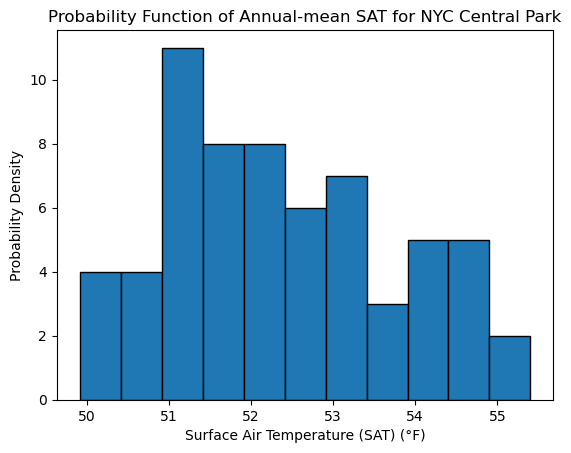

In [5]:
import netCDF4 as nc
import numpy   as np
import matplotlib.pyplot as plt

file_name = 'ERA5_SAT_195901-202112.nc'

def read_netcdf():
    root = nc.Dataset(file_name, 'r')
    gl_att = root.ncattrs()
    sat_attr = root['SAT'].ncattrs()
    variables = root.variables
    SAT_LatLong = np.array(root['SAT'][:,131,286])
    return (SAT_LatLong)
    
read_netcdf()
a = read_netcdf()


def time_series():

    root = nc.Dataset(file_name, 'r')
    gl_att = root.ncattrs()
    sat_attr = root['SAT'].ncattrs()
    variables = root.variables
    Months = np.array(root['SAT'][:,131,286])
    average_SAT = np.zeros(63) 
    for i in range (0,63):
        annual= np.array(root['SAT'][i*12:i*12+12,131,286])
        average_SAT[i] = np.mean(annual)
    return average_SAT



def plot_hist():
    annual_SAT_K = time_series()   
    annual_SAT_F = (annual_SAT_K-273.15)*1.8+32
    p = plt.hist(annual_SAT_F,bins=11, edgecolor='black')
    plt.ylabel("Probability Density")
    plt.xlabel("Surface Air Temperature (SAT) (°F)")
    plt.title("Probability Function of Annual-mean SAT for NYC Central Park")

    return plt.show(p)

plot_hist()


In [16]:
import math


for t in range(1,365):
    T = 364
    x1 = np.ones(364)
    t_2 = ((math.cos)(math.pi*2))*t/365
    t_3 = ((math.sin)(math.pi*2))*t/365
    A = np.array([x1,t_2,t_3])
    print(A)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.